# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Farhan Aulia Rahman
- **Email:** farhanaulia2809@gmail.com
- **ID Dicoding:** farhan0909

## Menentukan Pertanyaan Bisnis

- Bagaimana musim dan kondisi cuaca memengaruhi total jumlah penyewaan sepeda pada tahun 2011–2012?
- Apakah terdapat perbedaan pola penggunaan sepeda antara pengguna kasual dan pengguna terdaftar pada hari kerja dibandingkan akhir pekan ?
- Bagaimana distribusi waktu terbaik  untuk memaksimalkan penggunaan sepeda berdasarkan pola penyewaan historis?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Import libraries dasar untuk analisis data
import pandas as pd  # Untuk manipulasi data
import numpy as np  # Untuk operasi numerik

# Visualisasi data
import matplotlib.pyplot as plt  # Untuk visualisasi berbasis plot
import seaborn as sns  # Untuk visualisasi statistik

# Analisis geospasial (jika diperlukan)
import geopandas as gpd  # Untuk analisis data spasial
import folium  # Untuk membuat peta interaktif

# Paket tambahan
from datetime import datetime  # Untuk manipulasi waktu
from sklearn.preprocessing import MinMaxScaler  # Untuk normalisasi data (opsional)

# Pengaturan awal untuk visualisasi
plt.style.use('ggplot')  # Mengatur gaya plot
sns.set_palette('pastel')  # Mengatur palet warna untuk seaborn


## Data Wrangling

### Gathering Data

In [2]:
from google.colab import files

# Unggah file 'hour.csv'
print("Unggah file 'hour.csv'")
uploaded_hour = files.upload()

# Baca dataset 'hour.csv'
hour_file_name = list(uploaded_hour.keys())[0]
df_hour = pd.read_csv(hour_file_name)
print("\nDataset 'hour.csv' berhasil diunggah. Dimensi:", df_hour.shape)

# Unggah file 'day.csv'
print("\nUnggah file 'day.csv'")
uploaded_day = files.upload()

# Baca dataset 'day.csv'
day_file_name = list(uploaded_day.keys())[0]
df_day = pd.read_csv(day_file_name)
print("\nDataset 'day.csv' berhasil diunggah. Dimensi:", df_day.shape)


Unggah file 'hour.csv'


Saving hour.csv to hour.csv

Dataset 'hour.csv' berhasil diunggah. Dimensi: (17379, 17)

Unggah file 'day.csv'


Saving day.csv to day.csv

Dataset 'day.csv' berhasil diunggah. Dimensi: (731, 16)


**Insight:**
- Dataset hour.csv berisi 17379 baris dengan 17 kolom
- Dataset day.csv berisi 731 baris dengan 16 kolom

### Assessing Data

In [3]:
# Gambaran Umum Dataset 'hour.csv'
print("=== Gambaran Umum Dataset 'hour.csv' ===\n")

# Dimensi dataset
print(f"Dimensi (Baris, Kolom): {df_hour.shape}\n")

# Lima baris pertama
print("Lima baris pertama:")
print(df_hour.head(), "\n")

# Informasi dataset
print("Informasi dataset:")
df_hour.info()
print("\n")

# Statistik deskriptif
print("Statistik deskriptif:")
print(df_hour.describe(), "\n")

# Memeriksa nilai kosong
print("Jumlah nilai kosong di setiap kolom:")
print(df_hour.isnull().sum(), "\n")

=== Gambaran Umum Dataset 'hour.csv' ===

Dimensi (Baris, Kolom): (17379, 17)

Lima baris pertama:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1   

**Insight:**
- Tidak ada nilai kosong.
- Sebagian besar kolom memiliki tipe data numerik, kecuali kolom tanggal (dteday).
- Rata-rata penyewaan sepeda adalah 189 per jam, dengan variasi signifikan (1–977).
- Pengguna terdaftar mendominasi, dengan rata-rata 153 pengguna per jam dibandingkan 35 pengguna kasual per jam.
- Suhu (temp dan atemp) serta cuaca (weathersit) cenderung menjadi faktor penting yang dapat memengaruhi penyewaan.

In [4]:
# Gambaran Umum Dataset 'day.csv'
print("\n=== Gambaran Umum Dataset 'day.csv' ===\n")

# Dimensi dataset
print(f"Dimensi (Baris, Kolom): {df_day.shape}\n")

# Lima baris pertama
print("Lima baris pertama:")
print(df_day.head(), "\n")

# Informasi dataset
print("Informasi dataset:")
df_day.info()
print("\n")

# Statistik deskriptif
print("Statistik deskriptif:")
print(df_day.describe(), "\n")

# Memeriksa nilai kosong
print("Jumlah nilai kosong di setiap kolom:")
print(df_day.isnull().sum(), "\n")


=== Gambaran Umum Dataset 'day.csv' ===

Dimensi (Baris, Kolom): (731, 16)

Lima baris pertama:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82      

**Insight:**
- Tidak ada nilai kosong dalam dataset.
- Sebagian besar kolom memiliki tipe data numerik, kecuali kolom (dteday).
- Rata-rata penyewaan adalah 4.504 sepeda per hari, dengan variasi yang signifikan dari 22 sepeda hingga 8.714 sepeda.
- Pengguna terdaftar mendominasi jumlah penyewaan harian dengan rata-rata 3.656 pengguna dibandingkan pengguna kasual yang rata-ratanya hanya 848 pengguna.
- Sebagian besar data berada dalam kategori cuaca 1 dan 2 (cerah hingga berawan), dengan cuaca kategori 3 (hujan ringan) jarang terjadi.
- Rata-rata kelembaban adalah 62.7%, dengan nilai maksimum mendekati 97%.
- Kecepatan angin rata-rata adalah 19% dari nilai maksimumnya.


### Cleaning Data

In [5]:
# Cleaning Dataset 'hour.csv'

# Mengecek nilai null
print("Jumlah nilai null di setiap kolom (Dataset 'hour'):")
print(df_hour.isnull().sum())

# Tidak ada nilai null; jika ada, kita hapus baris yang mengandung nilai null
df_hour_cleaned = df_hour.dropna()

# Menyesuaikan outlier dengan mempertahankan data relevan
print("\nMenyesuaikan outlier (Dataset 'hour'):")

# Kolom yang memerlukan perhatian khusus
relevant_columns_hour = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Menggunakan metode IQR untuk mendeteksi outlier
Q1 = df_hour[relevant_columns_hour].quantile(0.25)
Q3 = df_hour[relevant_columns_hour].quantile(0.75)
IQR = Q3 - Q1

# Batas bawah dan atas untuk deteksi outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menyesuaikan hanya data yang tidak relevan
for col in relevant_columns_hour:
    if col == 'cnt':  # Mempertahankan data penyewaan ekstrem
        continue
    df_hour_cleaned[col] = df_hour_cleaned[col].clip(lower=lower_bound[col], upper=upper_bound[col])

print(f"Dataset asli memiliki {len(df_hour)} baris.")
print(f"Dataset setelah pembersihan memiliki {len(df_hour_cleaned)} baris.")


Jumlah nilai null di setiap kolom (Dataset 'hour'):
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Menyesuaikan outlier (Dataset 'hour'):
Dataset asli memiliki 17379 baris.
Dataset setelah pembersihan memiliki 17379 baris.


**Insight:**
- Tidak terdapat Missing Value
- Tidak terdapat outlier, dikarenakan pengecualian terhadap cuaca ekstrem dan Penyewaan Ekstrem (cnt, casual, registered)

In [6]:
# Cleaning Dataset 'day.csv'

# Mengecek nilai null
print("Jumlah nilai null di setiap kolom (Dataset 'day'):")
print(df_day.isnull().sum())

# Tidak ada nilai null; jika ada, kita hapus baris yang mengandung nilai null
df_day_cleaned = df_day.dropna()

# Menyesuaikan outlier dengan mempertahankan data relevan
print("\nMenyesuaikan outlier (Dataset 'day'):")

# Kolom yang memerlukan perhatian khusus
relevant_columns_day = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Menggunakan metode IQR untuk mendeteksi outlier
Q1 = df_day[relevant_columns_day].quantile(0.25)
Q3 = df_day[relevant_columns_day].quantile(0.75)
IQR = Q3 - Q1

# Batas bawah dan atas untuk deteksi outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menyesuaikan hanya data yang tidak relevan
for col in relevant_columns_day:
    if col == 'cnt':  # Mempertahankan data penyewaan ekstrem
        continue
    df_day_cleaned[col] = df_day_cleaned[col].clip(lower=lower_bound[col], upper=upper_bound[col])

print(f"Dataset asli memiliki {len(df_day)} baris.")
print(f"Dataset setelah pembersihan memiliki {len(df_day_cleaned)} baris.")

Jumlah nilai null di setiap kolom (Dataset 'day'):
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Menyesuaikan outlier (Dataset 'day'):
Dataset asli memiliki 731 baris.
Dataset setelah pembersihan memiliki 731 baris.


- Tidak terdapat Missing Value
- Tidak terdapat outlier, dikarenakan pengecualian terhadap cuaca ekstrem dan Penyewaan Ekstrem (cnt, casual, registered)

## Exploratory Data Analysis (EDA)

### Pertanyaan 1

In [7]:
# Agregasi data berdasarkan musim
season_agg = df_day.groupby('season')['cnt'].mean().reset_index()

# Agregasi data berdasarkan kondisi cuaca
weathersit_agg = df_day.groupby('weathersit')['cnt'].mean().reset_index()

# Menampilkan hasil
print("Rata-rata jumlah penyewaan berdasarkan musim:")
print(season_agg)

print("\nRata-rata jumlah penyewaan berdasarkan kondisi cuaca:")
print(weathersit_agg)


Rata-rata jumlah penyewaan berdasarkan musim:
   season          cnt
0       1  2604.132597
1       2  4992.331522
2       3  5644.303191
3       4  4728.162921

Rata-rata jumlah penyewaan berdasarkan kondisi cuaca:
   weathersit          cnt
0           1  4876.786177
1           2  4035.862348
2           3  1803.285714


### Pertanyaan 2

In [8]:
# Agregasi data rata-rata penggunaan sepeda berdasarkan kategori hari kerja
usage_agg = df_day.groupby('workingday')[['casual', 'registered']].mean().reset_index()

# Menampilkan hasil agregasi
print("Rata-rata penggunaan sepeda berdasarkan hari kerja:")
print(usage_agg)


Rata-rata penggunaan sepeda berdasarkan hari kerja:
   workingday       casual   registered
0           0  1371.134199  2959.034632
1           1   606.570000  3978.250000


### Pertanyaan 3

In [9]:
# Agregasi rata-rata penyewaan per jam
hourly_usage = df_hour.groupby('hr')['cnt'].mean().reset_index()

# Menampilkan hasil
print("Rata-rata penyewaan berdasarkan jam:")
print(hourly_usage)

Rata-rata penyewaan berdasarkan jam:
    hr         cnt
0    0   53.898072
1    1   33.375691
2    2   22.869930
3    3   11.727403
4    4    6.352941
5    5   19.889819
6    6   76.044138
7    7  212.064649
8    8  359.011004
9    9  219.309491
10  10  173.668501
11  11  208.143054
12  12  253.315934
13  13  253.661180
14  14  240.949246
15  15  251.233196
16  16  311.983562
17  17  461.452055
18  18  425.510989
19  19  311.523352
20  20  226.030220
21  21  172.314560
22  22  131.335165
23  23   87.831044


In [10]:
# Agregasi rata-rata penyewaan per bulan
monthly_usage = df_day.groupby('mnth')['cnt'].mean().reset_index()

# Menampilkan hasil
print("Rata-rata penyewaan berdasarkan bulan:")
print(monthly_usage)


Rata-rata penyewaan berdasarkan bulan:
    mnth          cnt
0      1  2176.338710
1      2  2655.298246
2      3  3692.258065
3      4  4484.900000
4      5  5349.774194
5      6  5772.366667
6      7  5563.677419
7      8  5664.419355
8      9  5766.516667
9     10  5199.225806
10    11  4247.183333
11    12  3403.806452


## Visualization & Explanatory Analysis

### Pertanyaan 1

<ipython-input-11-f2993036ebcd>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


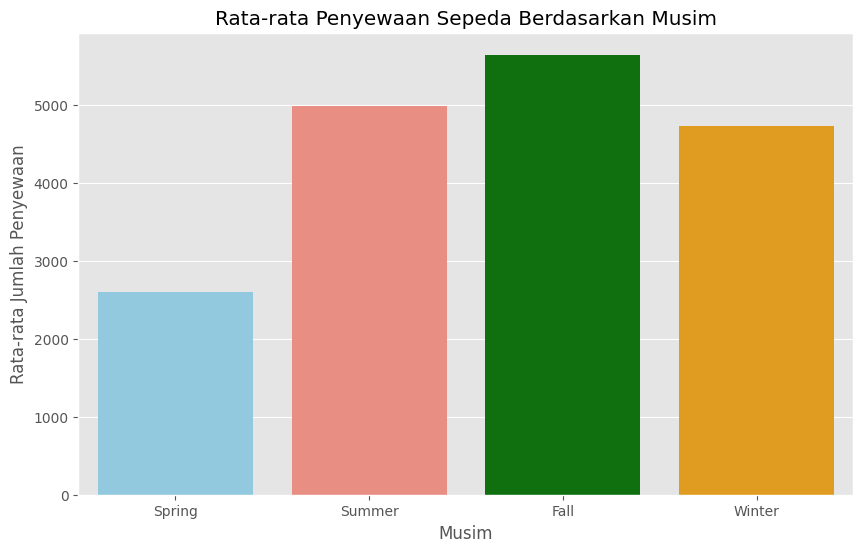

<ipython-input-11-f2993036ebcd>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


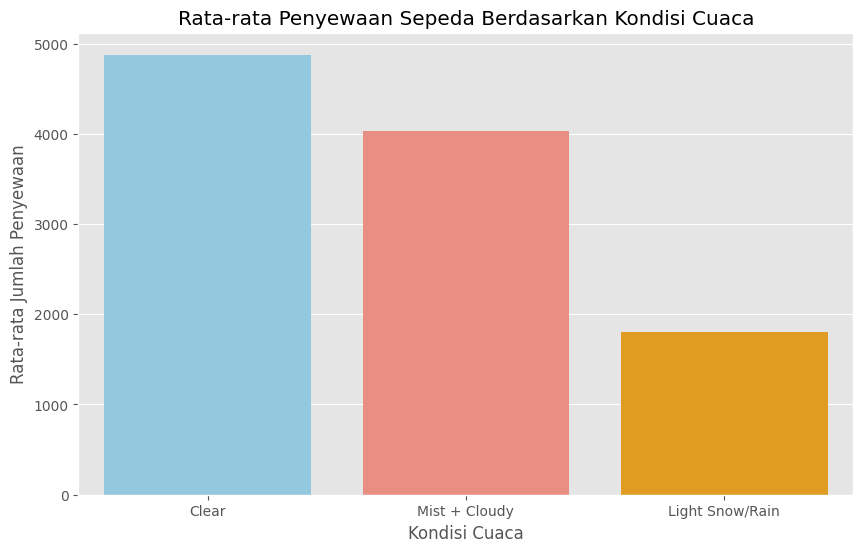

In [11]:
# Mapping untuk konversi angka ke label
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weathersit_mapping = {
    1: 'Clear',
    2: 'Mist + Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain'
}

# Mengonversi angka ke label
season_agg['season_label'] = season_agg['season'].map(season_mapping)
weathersit_agg['weathersit_label'] = weathersit_agg['weathersit'].map(weathersit_mapping)

# Visualisasi rata-rata penyewaan berdasarkan musim
plt.figure(figsize=(10, 6))
sns.barplot(
    x='season_label',
    y='cnt',
    data=season_agg,
    palette={'Spring': 'skyblue', 'Summer': 'salmon', 'Fall': 'green', 'Winter': 'orange'}
)
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.show()

# Visualisasi rata-rata penyewaan berdasarkan kondisi cuaca
plt.figure(figsize=(10, 6))
sns.barplot(
    x='weathersit_label',
    y='cnt',
    data=weathersit_agg,
    palette={'Clear': 'skyblue', 'Mist + Cloudy': 'salmon', 'Light Snow/Rain': 'orange', 'Heavy Rain': 'grey'}
)
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.show()


**Insight:**

Berdasarkan analisis, musim gugur (Fall) mencatat rata-rata penyewaan sepeda tertinggi sebesar 5.644,30, diikuti oleh musim panas (Summer) dengan 4.992,33. Musim dingin (Winter) menunjukkan penyewaan moderat sebesar 4.728,16, sedangkan musim semi (Spring) memiliki rata-rata terendah sebesar 2.604,13. Hal ini mengindikasikan bahwa musim gugur dan musim panas adalah periode puncak penyewaan, sementara musim dingin tetap menunjukkan permintaan yang signifikan.

Dari sisi cuaca, penyewaan tertinggi terjadi saat cuaca cerah (Clear) dengan rata-rata 4.876,78, diikuti oleh kabut dan berawan (Mist + Cloudy) sebesar 4.035,86. Penyewaan turun drastis pada kondisi hujan atau salju ringan (Light Snow/Rain) menjadi 1.803,29, dan tidak ada penyewaan yang tercatat pada kondisi hujan deras (Heavy Rain), yang menunjukkan dampak ekstrem cuaca buruk terhadap minat penyewaan.

### Pertanyaan 2

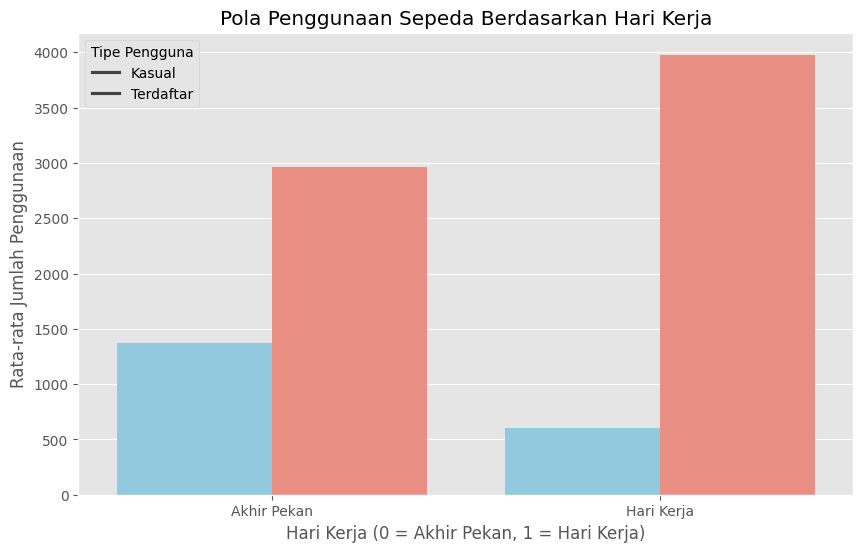

In [12]:
# Visualisasi pola penggunaan sepeda
plt.figure(figsize=(10, 6))
sns.barplot(
    x='workingday',
    y='value',
    hue='variable',
    data=pd.melt(usage_agg, id_vars='workingday', value_vars=['casual', 'registered']),
    palette={'casual': 'skyblue', 'registered': 'salmon'}
)
plt.title('Pola Penggunaan Sepeda Berdasarkan Hari Kerja')
plt.xlabel('Hari Kerja (0 = Akhir Pekan, 1 = Hari Kerja)')
plt.ylabel('Rata-rata Jumlah Penggunaan')
plt.xticks(ticks=[0, 1], labels=['Akhir Pekan', 'Hari Kerja'])
plt.legend(title='Tipe Pengguna', labels=['Kasual', 'Terdaftar'])
plt.show()


**Insight:**

Berdasarkan analisis, terdapat perbedaan pola penggunaan sepeda antara pengguna kasual dan terdaftar pada hari kerja dan akhir pekan. Pengguna kasual lebih banyak menyewa sepeda pada akhir pekan dengan rata-rata 1.371,13 dibandingkan pada hari kerja yang hanya 606,57. Sebaliknya, pengguna terdaftar lebih aktif menyewa sepeda pada hari kerja dengan rata-rata 3.978,25, sementara pada akhir pekan rata-rata penyewaan mereka menurun menjadi 2.959,03.

Hal ini menunjukkan bahwa pengguna kasual cenderung menggunakan sepeda untuk rekreasi atau aktivitas santai pada akhir pekan, sedangkan pengguna terdaftar lebih memanfaatkan sepeda untuk keperluan rutin seperti transportasi harian selama hari kerja.

### Pertanyaan 3

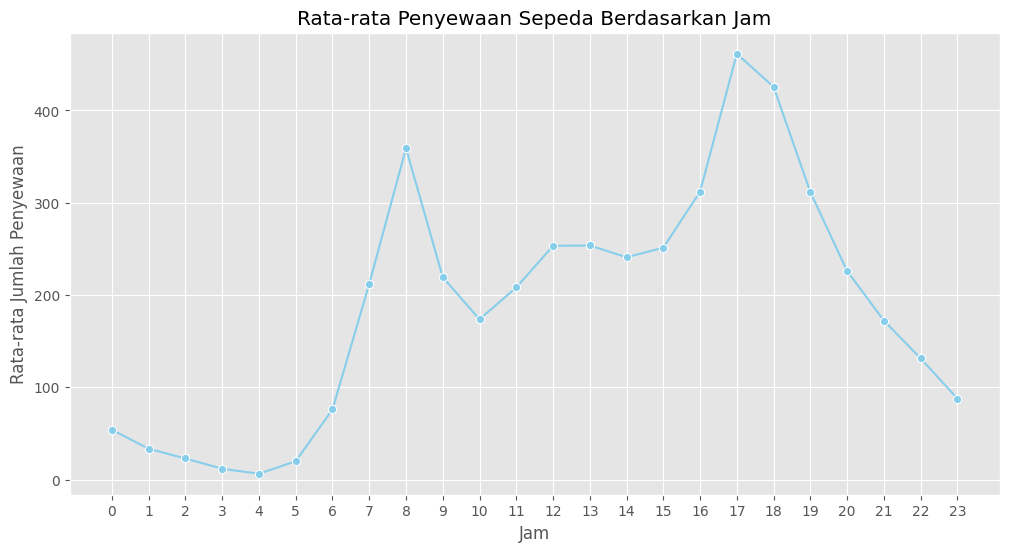

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=hourly_usage, marker='o', color='skyblue')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


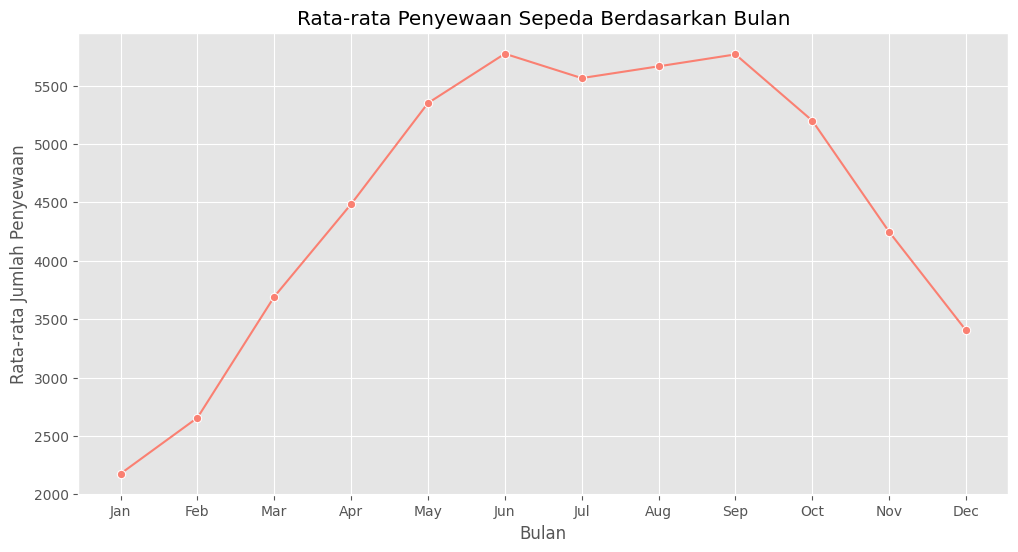

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='mnth',
    y='cnt',
    data=monthly_usage,
    marker='o',
    color='salmon'
)
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(
    ticks=range(1, 13),
    labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
)
plt.grid(True)
plt.show()



**Insight:**

Berdasarkan analisis distribusi penggunaan sepeda berdasarkan jam, terdapat dua puncak utama, yaitu pada pukul 08:00 dengan rata-rata 359,01 dan pukul 17:00 dengan rata-rata 461,45, yang menunjukkan jam sibuk pagi dan sore, kemungkinan besar terkait dengan aktivitas perjalanan rutin seperti pergi dan pulang kerja. Sebaliknya, penyewaan paling rendah terjadi pada dini hari (pukul 03:00 hingga 05:00), dengan rata-rata di bawah 20, mencerminkan rendahnya aktivitas pada waktu tersebut.

Pada tingkat bulanan, penyewaan sepeda meningkat secara bertahap mulai bulan Maret hingga mencapai puncaknya pada bulan Agustus dengan rata-rata 5.766,52, sebelum menurun secara bertahap hingga Desember. Bulan dengan penyewaan tertinggi berada di musim panas, sementara bulan Januari dan Februari menunjukkan rata-rata penyewaan terendah, yaitu 2.176,34 dan 2.655,30.

## Analisis Clustring Manual Grouping

In [15]:
# Clustering jam berdasarkan rata-rata penyewaan
def cluster_hours(hour):
    if 7 <= hour <= 9:
        return 'Pagi Sibuk'
    elif 16 <= hour <= 18:
        return 'Sore Sibuk'
    elif 10 <= hour <= 15:
        return 'Jam Santai'
    else:
        return 'Jam Sepi'

# Menambahkan kolom kluster jam
df_hour['hour_cluster'] = df_hour['hr'].apply(cluster_hours)

# Clustering bulan berdasarkan rata-rata penyewaan
def cluster_month(month):
    if month in [6, 7, 8]:
        return 'Musim Tinggi'
    elif month in [3, 4, 5, 9, 10, 11]:
        return 'Musim Menengah'
    else:
        return 'Musim Rendah'

# Menambahkan kolom kluster bulan
df_day['month_cluster'] = df_day['mnth'].apply(cluster_month)

# Melihat hasil clustering
print(df_hour[['hr', 'hour_cluster']].head())
print(df_day[['mnth', 'month_cluster']].head())


   hr hour_cluster
0   0     Jam Sepi
1   1     Jam Sepi
2   2     Jam Sepi
3   3     Jam Sepi
4   4     Jam Sepi
   mnth month_cluster
0     1  Musim Rendah
1     1  Musim Rendah
2     1  Musim Rendah
3     1  Musim Rendah
4     1  Musim Rendah


<ipython-input-16-d3b11b3036fe>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


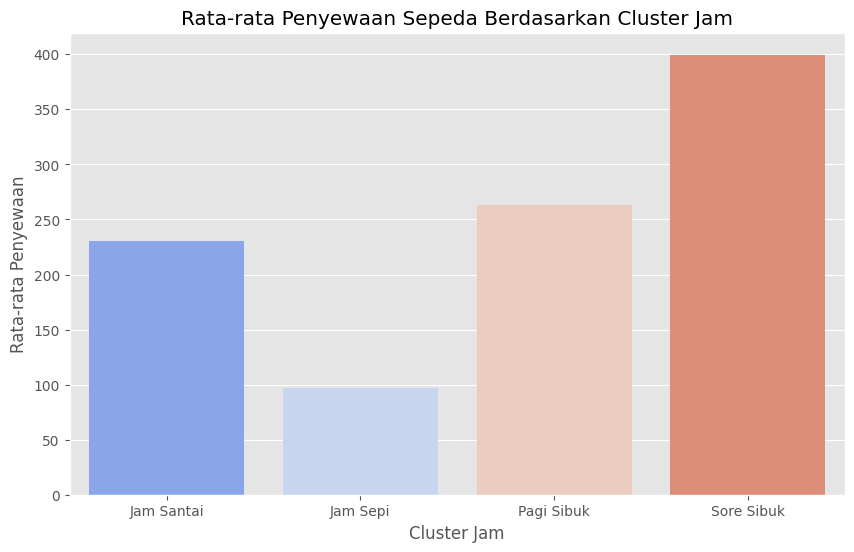

In [16]:
# Agregasi rata-rata penyewaan berdasarkan cluster jam
hour_cluster_agg = df_hour.groupby('hour_cluster')['cnt'].mean().reset_index()

# Visualisasi hasil clustering jam
plt.figure(figsize=(10, 6))
sns.barplot(
    x='hour_cluster',
    y='cnt',
    data=hour_cluster_agg,
    palette='coolwarm'
)
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Cluster Jam')
plt.xlabel('Cluster Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.show()


<ipython-input-17-b8babf82e0b0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


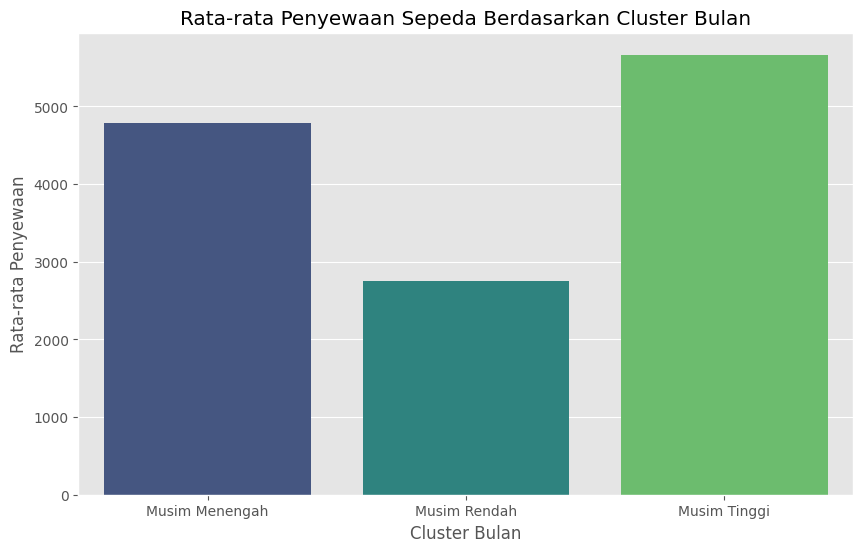

In [17]:
# Agregasi rata-rata penyewaan berdasarkan cluster bulan
month_cluster_agg = df_day.groupby('month_cluster')['cnt'].mean().reset_index()

# Visualisasi hasil clustering bulan
plt.figure(figsize=(10, 6))
sns.barplot(
    x='month_cluster',
    y='cnt',
    data=month_cluster_agg,
    palette='viridis'
)
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Cluster Bulan')
plt.xlabel('Cluster Bulan')
plt.ylabel('Rata-rata Penyewaan')
plt.show()


## Conclusion

- Conclution pertanyaan 1 :
Musim dan kondisi cuaca secara signifikan memengaruhi total penyewaan sepeda pada tahun 2011–2012. Penyewaan tertinggi terjadi pada musim gugur dan musim panas, sementara musim semi memiliki penyewaan terendah. Cuaca cerah mendorong penyewaan tertinggi, sedangkan hujan atau salju ringan mengurangi penyewaan secara drastis, dan tidak ada penyewaan tercatat saat hujan deras.
- Conclution pertanyaan 2 :
Terdapat perbedaan pola penggunaan sepeda antara pengguna kasual dan terdaftar pada hari kerja dan akhir pekan. Pengguna kasual lebih aktif menyewa sepeda pada akhir pekan untuk rekreasi, sedangkan pengguna terdaftar lebih banyak memanfaatkannya pada hari kerja untuk keperluan transportasi rutin.
- Conclution pertanyaan 3 :
Terdapat pola penggunaan sepeda yang jelas berdasarkan waktu. Pada tingkat jam, puncak penyewaan terjadi pada pukul 08:00 dan 17:00, yang mencerminkan aktivitas perjalanan pagi dan sore. Sementara itu, pada tingkat bulanan, penyewaan tertinggi terjadi selama musim panas, khususnya pada bulan Agustus, sedangkan bulan Januari dan Februari memiliki tingkat penyewaan terendah. Pola ini menunjukkan bahwa waktu terbaik untuk memaksimalkan penggunaan sepeda adalah selama jam sibuk pagi dan sore serta pada bulan-bulan musim panas.
- Conclution Clustering : penyewaan sepeda tertinggi terjadi pada kategori "Sore Sibuk" (16:00–18:00), diikuti oleh "Pagi Sibuk" (07:00–09:00), sementara kategori "Jam Santai" (10:00–15:00) menunjukkan penyewaan moderat, dan "Jam Sepi" (00:00–06:00 dan 19:00–23:00) memiliki penyewaan paling rendah. Dari sisi musiman, Musim Tinggi (Juni–Agustus) mencatat rata-rata penyewaan tertinggi, diikuti oleh Musim Menengah (Maret–Mei dan September–November), sedangkan Musim Rendah (Desember–Februari) memiliki penyewaan terendah.

## Download Data

In [20]:
# Export dataset hour.csv setelah data cleaning dan clustering
df_hour.to_csv('hour_cleaned.csv', index=False)

# Export dataset day.csv setelah data cleaning dan clustering
df_day.to_csv('day_cleaned.csv', index=False)

# Download file dari Colab
from google.colab import files
files.download('hour_cleaned.csv')
files.download('day_cleaned.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>